# 결정트리

## 개념

- 데이터에 들어있는 규칙을 학습을 통해 찾고, **트리 기반**으로 **분류의 규칙을 만들어 내는 알고리즘이다**
- 성능
  - 어떤 기준의 규칙인가(규칙을 만드는 룰, 임계값)
  - 분류를 하는 규칙 어떻게 효율적으로 배치하는가
  - **깊이**

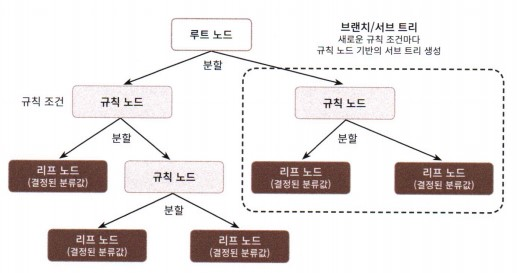

In [79]:
from IPython.display import Image
Image('/content/drive/MyDrive/today/분류_결정트리.jpg')

```
- 전체 데이터를 특정 노드에서 분류가 되어 전체적으로 지도학습의 분류 주제를 구현하는 알고리즘
- 노드
  - 노드 : 분기점, 가지의 맨끝점, 시작점
  - 루트노드 : 데이터의 분기되는 시작점
  - 규칙노드 : 규칙(룰)이 존재, 룰에 의해서 데이터를 분기한다.피쳐(특성, 독립변수)들을 결합, 조합하여 규칙을 생성하고, 그 기준으로 분기를 하는 노드, 결과물은 브랜치가 되어서 서브트리가 만들어진다
  - 리프노드 : 더 이상의 분기점이 없다(끝) -> 어떤 결정된 클래스(종속변수)값을 가진다
- 브랜치/서브트리 : 새로운 규칙이 조건에 의해서 생성되면, 서브트리가 생겼다 표현한다

- depth(깊이) : 깊을수록, 정확도는 올라가겠지만, 성능저하의 원인, 과적합의 원인 -> 적절한 깊이감에 대한 조절 -> 이를 처리하기 위한 임계값 필요
- 목표 포인트
  - 데이터가 균일하게 분류되도록 분할 처리하는 것
  - 데이터의 균일성을 스케일을 통해서 처리하는 것
  - 과적합에 대한 대비, 깊이감 조절, 데이터의 쏠림을 방지
```


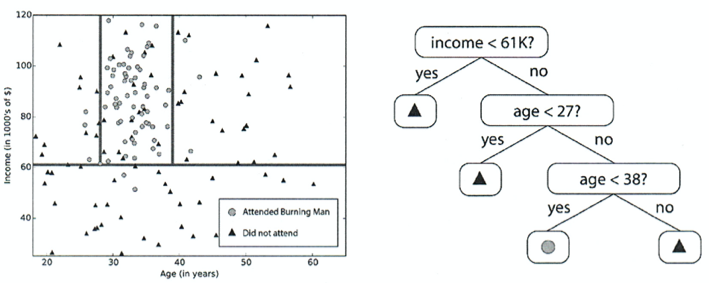

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/res (1)/ml-의사결정트리.png')

## 적용

In [3]:
# 1. 모듈 가져오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 하이퍼 파라미터

- criterion
  - 개요
    - **결정트리 알고리즘**에서 **데이터의 균일성**(정보의 균일성)이 높게 되도록 데이터 세트가 선택되게 **규칙을 만드는 것이 중요**하다

  - 지표(방법)
    - "entropy"
      - 엔트로피를 이용한 정보이득지수(information gain)
      - 혼잡도
      - 엔트로피는 주어진 데이터 집합의 혼잡도를 표현
      - 서로 다른 데이터들이 뒤섞여 있다면 엔트로피가 높다
      - 같은 데이터들이 모여 있으면 엔트로피가 낮다
      - 정보이득지수 = 1 - 엔트로피지수값
        - **판단 : 정보이득지수가 임계값(설정값)보다 크다면 규칙노드로 판단이 된다 -> 브랜치(가지치기) 실행**

    - "gini"
      - 불평등 지수(경제학에서표현)에서 나오는 지표
      - 0: 가장 평등
      - 1: 1에 가까울수록 불평등해진다
      - 데이터(분류된 데이터 기준)가 다양하면 평등, 특정값에 쏠리면 불평등

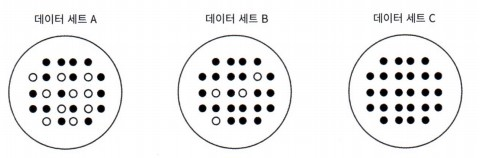

In [4]:
Image('/content/drive/MyDrive/today/분류_결정트리2.jpg')
# 엔트로피 관점에서 해석
  # A SET : 여러정보가 섞여있다 -> 혼탁
  # C SET : 정보가 균일하다 -> 특정 데이터로 쏠려있다
# 지니 계수
  # A SET : 여러 데이터가 섞여있다 -> 평등하다
  # C SET : 특정 데이터가 균일하다(특정 데이터로 쏠려있다) -> 불평등하다 => 1로 수렴     

In [5]:
# 2. 알고리즘 생성
'''
criterion : 규칙 노드는 만드는 판단기준 엔트로피 혹은 지니계수 사용하는 기준만 지정, 임계값 접근은 
            파라미터에서 미지원 -> 튜닝 포인트는 엔트로피 혹은 지니 둘중 어느쪽에서 더 성능이 
            나오는지 확인
'''
clf = DecisionTreeClassifier( )

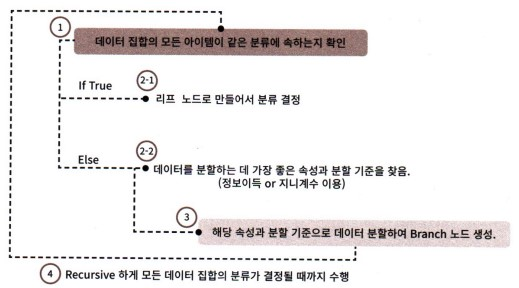

In [6]:
Image('/content/drive/MyDrive/today/분류_결정트리3.jpg')
# 가지치기 원리
# 1번은 노드에 도착했고, 데이터를 살펴보니 모두 같은 것만 남았다 -> 리프노드가 된다(끝)
# 1 -> 2번은 더이상 분류할게 없다 : 리프노드가 되었다
# 1 -> 2-2번은 규칙노드를 만들어야 한다 -> 기준이 필요(지니, 엔트로피 지정)
#   기준 만족하면 브랜치 노드 작동(가지치기 작동)
# 4번은 기준이 만족할 때까지 반복

## 과적합 방지 하이퍼파라미터

- 깊이를 어느 정도 줄것인가?
- 리프노드를 몇개로 갈것인가?
- 규칙노드로 가지치키를 할대 전제 조건을 어떻게 할것인가?

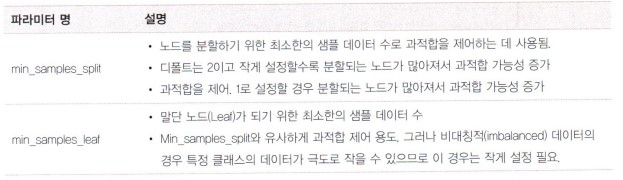

In [7]:
Image('/content/drive/MyDrive/today/분류_결정트리4.jpg')
# min_samples_split
# 규칙노드가 만들어지는 기본 전제 조건으로 몇개의 샘플데이터가 남았을 때 스플릿을 할 것인가
# 값이 작을 수록 튀는 값도 다 잡아낼 수 있고 -> 과적합이 될 것 -> 아주 작게 1을 지양하지 말자
# min_samples_leaf
# 리프노드가 되기위해 해당 노드에서 최소 몇개의 샘플을 가지고 있는가? 설정값
# 최소 이정도 샘플은 들고 있어야 리프 노드가 된다

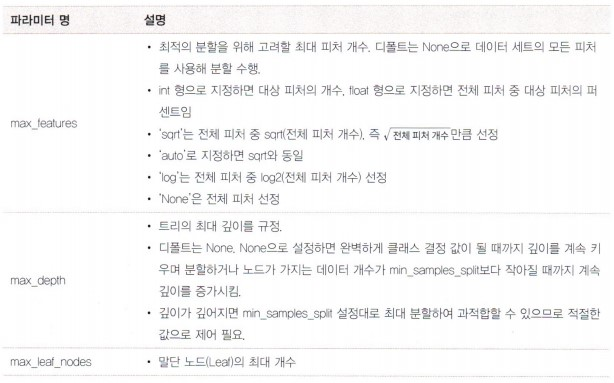

In [8]:
Image('/content/drive/MyDrive/today/분류_결정트리5.jpg')
# 최대 특정 수
# 최대 깊이
# 최대 리프노드 수

In [9]:
# 2. 알고리즘 생성
'''
criterion : 규칙 노드는 만드는 판단기준 엔트로피 혹은 지니계수 사용하는 기준만 지정, 임계값 접근은 
            파라미터에서 미지원 -> 튜닝 포인트는 엔트로피 혹은 지니 둘중 어느쪽에서 더 성능이 
            나오는지 확인
min_samples_split
min_samples_leaf
max_features
max_depth
max_leaf_node
random_state = 알고리즘 생성시 사용하는, 내부에서 사용하는 모든 난수의 씨드 설정
- 고정하면 언제나 동일한 성능을 내는 알고리즘 생성
'''
clf = DecisionTreeClassifier(random_state= 0)
clf

DecisionTreeClassifier(random_state=0)

In [10]:
# 3. 데이터 준비
tmp = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    tmp.data, tmp.target, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape,

((112, 4), (38, 4))

In [11]:
# 4. 훈련
clf.fit( X_train, y_train )

DecisionTreeClassifier(random_state=0)

In [12]:
# 5. 예측 및 성능평가
clf.score( X_test, y_test )

0.9736842105263158

## 결정트리 분기과정
- 결정 트리가 어떤 과정을 거쳐서, 노드를 분류, 생성했는지 시각적으로 확인

In [13]:
from sklearn.tree import export_graphviz
# 모델을 덤프해서 데이터 정답을 같이 표기하여 덤프
export_graphviz(clf, out_file = 'dtree.model',     # 학습된 알고리즘, 파일명
                feature_names= tmp.feature_names,  # 특성 이름
                class_names = tmp.target_names,    # 정답 이름
                filled = True)

In [14]:
# 시각화
import graphviz
# graphviz 라이브러리 활용해서 덤프파일(모델, 정답, 정답의 이름)을 읽어들여서 시각화를 할 수 있다
with open('dtree.model') as f:
  # 텍스트 형태로 읽었다
  mGraph = f.read()


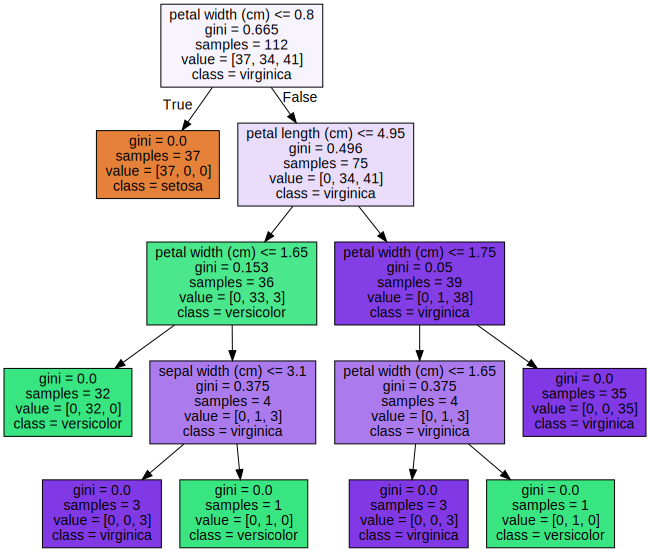

In [15]:
# 시각화
graphviz.Source( mGraph )

- 결정트리 상에 규칙노드들을 체크해 보니, 사용하지 않은 특성(피쳐)가 보인다. 사용비중이 차이가 나는 것이 보인다.
- 결정트리의 분류를 완성할때 피쳐별 기여도가 다르다는 것을 의미
- 시각화를 해서 중요 피쳐를 표현

In [16]:
import seaborn as sns
import numpy as np

In [17]:
clf.feature_importances_

array([0.        , 0.02014872, 0.39927524, 0.58057605])

In [18]:
f1 = np.round( clf.feature_importances_, 3 )
f1

array([0.   , 0.02 , 0.399, 0.581])

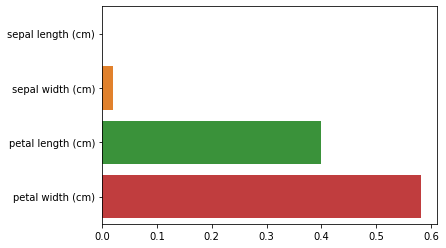

In [19]:
sns.barplot(x = f1, y = tmp.feature_names)
# sepal length는 분류하는데 전혀 기여도가 없다
# 이 컬럼을 제외해도 결정 트리 알고리즘에서는 문제가 없다

## 과적합 처리
- 데이터를 생성해서 사용(범위 데이터로써, 특정 목적을 가지게 생성)
- make_xxxx()

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# 더미 데이터 생성
'''
n_samples : 생성되는 전체 데이터 수
n_features : 특성의 총 수, 독립변수의 총개수
n_informative : 독립변수들 중에서 종속변수(정답)와 상관관계가 있는 성분의 수
n_redundant : 독립변수들 중에서 다른 독립변수들과 선형 조합을 나타낼 수 있는 수  
n_classes : 종속변수의 개수 (정답의 수)
n_clusters_per_class : 클래스(정답) 당 클러스터(군집)의 개수
random_state : 데이터 생성시 난수를 사용하며느 그 씨드값을 제시, 미사용 -> 현재시간
'''
X, y = make_classification(n_features= 2, n_redundant = 0, n_informative = 2,
                    n_classes = 3, n_clusters_per_class = 1, random_state = 0)
X.shape, y.shape

((100, 2), (100,))

In [22]:
X[0]

array([ 0.12041909, -1.68941375])

In [23]:
X[:, 0]

array([ 0.12041909,  1.09665605,  0.88426577,  0.95048011,  1.04421447,
        0.50102164,  1.10447379, -2.5077599 , -0.00811816,  0.31338067,
       -0.04687748,  1.20888898,  1.71173001,  1.29670808,  1.24188996,
       -1.78273822, -1.50514147,  0.87163989,  2.53026908,  0.95000368,
       -1.53716448, -2.13650855,  1.01037788,  1.9876467 ,  1.12463497,
       -0.65122279,  0.85144036, -0.10789457, -0.41699944, -0.77993003,
        2.34137626,  0.79625824,  1.3641878 ,  0.04699455,  0.77274433,
       -1.20971021, -1.63281739,  1.79574591,  0.89518388, -2.11213297,
       -1.21815226,  1.23240644,  0.74261606,  2.40620516, -1.68765743,
        1.23567148,  1.08921755, -2.82040545,  0.21654345, -0.276832  ,
        0.28914807,  0.67311496, -0.2415271 ,  1.16816014, -0.27013824,
        1.07961675,  0.74139141, -1.75179327,  0.28268758, -1.35324757,
        1.86752028, -1.54860553, -2.71061298,  0.85041166,  0.86614747,
        1.01341491, -0.85450433,  1.12229408,  0.85144223,  2.18

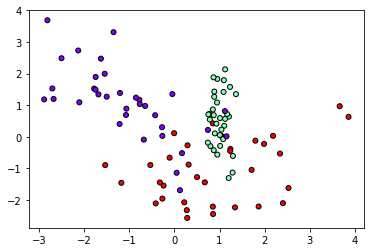

In [24]:
# scatter
# X축 첫번째 값 집합, y축에는 두번째 값 집합 사용
plt.scatter(X[:,0], X[:,1],
            s = 25,
            marker ='o',
            c = y,
            cmap = 'rainbow',
            edgecolors = 'k')
# 결정트리 관점에서 보면
# 청록색 데이터는 바로 분류가 가능하다
# 빨간색, 보라색은 몇번의 규칙노드를 통해서 영역을 쪼갤 수 있다

- 등고선 plot을 이용해서 분포싀 경계를 그릴수 있다
- 어떤  분류 모델이던, 모델, X,y를 넣으면 시각화 할 수 있게 제작
- 최종적으로는 2D로 표현

In [29]:
# numpy로 시작값에서 끝값까지, 특정 값 간격으로, 구간 나누기
import numpy as np

In [31]:
# 1 ~ 2 사이를 4개의 포인트로 나눠주세요
x1 = np.linspace(1, 2, num = 4)
y1 = np.linspace(4, 5, num = 4)
x1, y1

(array([1.        , 1.33333333, 1.66666667, 2.        ]),
 array([4.        , 4.33333333, 4.66666667, 5.        ]))

In [33]:
# 위의 재료를 가지고 (특성1, 특성2)로 모인 데이터 형태로 가공하는게 목표
xx, yy = np.meshgrid(x1, y1)
xx

array([[1.        , 1.33333333, 1.66666667, 2.        ],
       [1.        , 1.33333333, 1.66666667, 2.        ],
       [1.        , 1.33333333, 1.66666667, 2.        ],
       [1.        , 1.33333333, 1.66666667, 2.        ]])

In [34]:
yy

array([[4.        , 4.        , 4.        , 4.        ],
       [4.33333333, 4.33333333, 4.33333333, 4.33333333],
       [4.66666667, 4.66666667, 4.66666667, 4.66666667],
       [5.        , 5.        , 5.        , 5.        ]])

In [35]:
xx.shape, yy.shape, xx.ndim, xx.dtype

((4, 4), (4, 4), 2, dtype('float64'))

In [39]:
# xx를 1차 배열로 바꾼다 -> flattern or reshape
print(xx.ravel())
print(xx.shape)
print(xx.ndim)

[1.         1.33333333 1.66666667 2.         1.         1.33333333
 1.66666667 2.         1.         1.33333333 1.66666667 2.
 1.         1.33333333 1.66666667 2.        ]
(4, 4)
2


In [40]:
# x축에 대한 y축의 세트 구성 => (특성1, 특성2)
'''
[
  [특성1, 특성2],
  [xx의 첫번째, yy의 첫번째],
  ..
]
'''
np.c_[xx.ravel(), yy.ravel()]

array([[1.        , 4.        ],
       [1.33333333, 4.        ],
       [1.66666667, 4.        ],
       [2.        , 4.        ],
       [1.        , 4.33333333],
       [1.33333333, 4.33333333],
       [1.66666667, 4.33333333],
       [2.        , 4.33333333],
       [1.        , 4.66666667],
       [1.33333333, 4.66666667],
       [1.66666667, 4.66666667],
       [2.        , 4.66666667],
       [1.        , 5.        ],
       [1.33333333, 5.        ],
       [1.66666667, 5.        ],
       [2.        , 5.        ]])

(40000, 2)


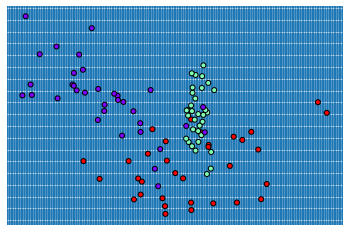

In [46]:
def show_rect_clf_boundary( clf, X, y ):
  '''
    모델을, 이 안에서 학습하여서 그리겟다
    - clf : 분류기, 알고리즘
    - X   : feature data, 특성, 독립변수
    - y   : target data, 정답, 종속변수
  '''
  # 0. 차트 외관에 필요한 요소 준비
  _, ax = plt.subplots()
  # 1. 산포도(산점도) 드로잉
  ax.scatter( X[ :, 0], X[ :, 1], s=25, marker='o', c=y, cmap='rainbow', edgecolors='k',
              # 칼러 리미트 설정, 그리는 내용이 위로, 아래로 조정하는 zorder : depth 조정
             clim=( y.min(), y.max() ), zorder=3
             )
  # 2. 차트 외곽 정리
  ax.axis('off')   # 축 정보 삭제
  ax.axis('tight') # 데이터의 분포가 펼쳐졌을 때 빡빡한 형태를 띈다면 여유있게 조절
  
  # 3. 면적(같은 답을 가진 사각 영역에 대한 공간)에 대한 데이터 준비
  #    분류에 대한 경계성 계산 재료 준비
  #    화면 공간상의 픽셀을 구한다(그 픽셀의 좌표는 독립변수 2개가 된다)
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
  # 좌표계의 각 축별 시작값, 끝값
  #print(xlim_start, xlim_end, ylim_start, ylim_end)
  # 구간 간격을 200으로 설정
  x_std = np.linspace(xlim_start, xlim_end, num = 200)
  y_std = np.linspace(ylim_start, ylim_end, num = 200) 
  xx, yy = np.meshgrid(x_std, y_std)
  tmp_xy = np.c_[xx.ravel(), yy.ravel()]
  print(tmp_xy.shape)

  '''
    tmp_xy[ : , 0] : 준비한 좌표계 40000개중 x축 성분
    tmp_xy[ : , 1] : 준비한 좌표계 40000개중 y축 성분
    s: 점의 크기
    zorder : 그려지는 깊이, 낮을수록 밑으로, 클수록 위로
  '''
  ax.scatter(tmp_xy[:, 0],tmp_xy[:, 1], s=1, zorder=1)
  
  # 4. 알고리즘 생성(이미 완료됨)  
  # 5. 학습, 예측
  clf.fit(X,y)
  #Z = clf.predict()

  # 6. 등고선 플롯을 그리기 위한 작업(분류된 영역 그리기)
  pass

show_rect_clf_boundary(DecisionTreeClassifier(), X, y)

In [ ]:
## 위의 코드와 같음(정리본) 

좌표별로 예측된 분류값 [2 2 2 ... 2 2 2] [0 1 2]
(200, 200) (200, 200) (40000,) (200, 200)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'clim'


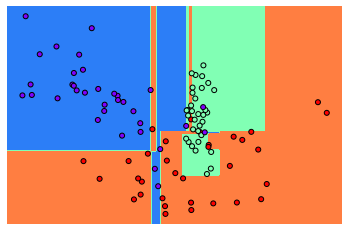

In [53]:
def show_rect_clf_boundary( clf, X, y ):
  '''
    모델을, 이 안에서 학습하여서 그리겟다
    - clf : 분류기, 알고리즘
    - X   : feature data, 특성, 독립변수
    - y   : target data, 정답, 종속변수
  '''
  _, ax = plt.subplots()
  ax.scatter( X[ :, 0], X[ :, 1], s=25, marker='o', c=y, cmap='rainbow', edgecolors='k',clim=( y.min(), y.max() ), zorder=3)
  ax.axis('off')  
  ax.axis('tight') 
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
  x_std = np.linspace(xlim_start, xlim_end, num = 200)
  y_std = np.linspace(ylim_start, ylim_end, num = 200) 
  xx, yy = np.meshgrid(x_std, y_std)
  tmp_xy = np.c_[xx.ravel(), yy.ravel()]
   
  # 4. 학습, 예측
  clf.fit(X,y)
  # 5. 좌표계(혹은, 면적을 그리기 웨해 준비한 200*200 좌표 셋 데이터)에 대해 예측 수행
  Z = clf.predict(tmp_xy)
  print('좌표별로 예측된 분류값', Z, np.unique(Z))
  print(xx.shape, yy.shape, Z.shape, Z.reshape(xx.shape).shape)
  # 6. 등고선 플롯을 그리기 위한 작업(분류된 영역 그리기)

  ax.contourf( xx,
               yy,
               Z.reshape( xx.shape ),
               # 데코레이션 파트
               alpha  = 1.0,
               levels = np.arange( len( np.unique( Z ) ) + 1 ) - 0.5, # 면적 색상에 대한 준비
               cmap   = 'rainbow',
               clim   = ( y.min(), y.max()),
               zorder = 1
  )
  pass

show_rect_clf_boundary(DecisionTreeClassifier(), X, y)
# 과적합된 모델의 분류 지도 -> 모든 케이스를 거의다 분류했다 -> 과적합, 편향적이다
# 이를 해결하기 위해서는 알고리즘 레벨에서 과적합 방지 장치를 작동시켜야 한다

좌표별로 예측된 분류값 [2 2 2 ... 1 1 1] [0 1 2]
(200, 200) (200, 200) (40000,) (200, 200)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'clim'


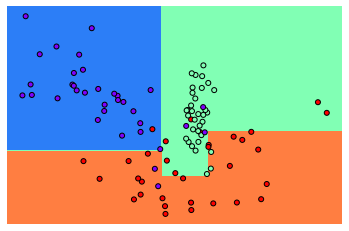

In [54]:
# 과적합 방지 파라미터를 리프노드의 최소 데이터 수를 조정해서
# 적당하게 분류지도가 완성되었다
# 실제 진행시에는 고려사항 및 테스트가 필요하다
show_rect_clf_boundary( DecisionTreeClassifier(
    min_samples_leaf = 6    
), X, y)

# 앙상블

## 개념

- **Ensemble Learning(앙상블 학습법)**
- **여러개의 알고리즘**(분류)을 생성(동일, 서로다른)하여 학습을 수행하고, **그 예측값을 통합**(평균, ...)해서 최종예측을 수행하는 기법
  - 약한 알고리즘들을 뭉쳐서 강한 모델을 만들 수 있다
- **단일 분류기(모델을 1개 사용)보다 높은** 성능 혹은 신뢰성을 얻을 수 있었다

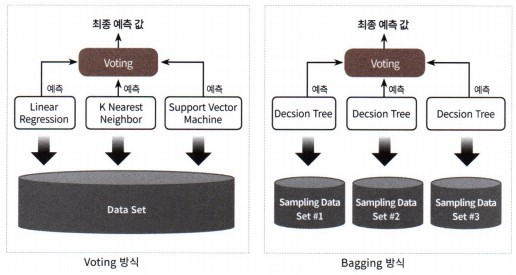

In [122]:
Image('/content/drive/MyDrive/today/분류_앙상블1.jpg')
# 동일 알고리즘을 여러개 사용한 것인가? -> 배깅
# 다른 알고리즘을 여러개 사용한 것인가? -> 보팅

## 보팅

### 특징, 포인트

- Voting
- 서로 다른 알고리즘 사용
- 종류
  - **하드 보팅**
    - **다수결의 원칙**
  - **소프트 보팅**
    - 하드 보팅의 문제점 -> 다수결의 의존하다 보니, 질적인 부분, 실제 비중은 고려하지 못했다
    - **정답이 결정되는 모든 확률을 더해서 평균내서 높은 쪽으로 결론을 내는 방식을 취한다**

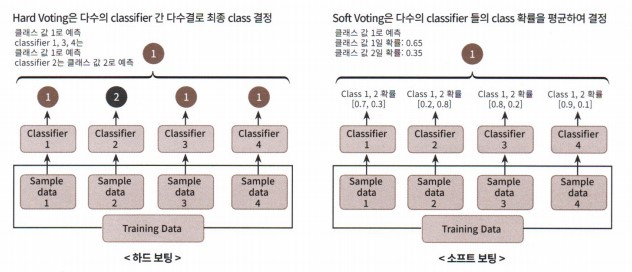

In [123]:
Image('/content/drive/MyDrive/today/분류_앙상블2_보팅.jpg')

### 보팅 구현, 실습

#### 필요 모듈 가져오기

In [124]:
# 보팅 구현, 실습 -> 여러 알고리즘, 하드 혹은 소프트 보팅 방식 적용
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 보팅
from sklearn.ensemble import VotingClassifier

# 데이터셋
from sklearn.datasets import load_breast_cancer

# 데이터셋 준비(훈련용, 테스트용)
from sklearn.model_selection import train_test_split

# 평가도구
from sklearn.metrics import accuracy_score

# 데이터 처리
import pandas as pd

#### 데이터 준비

In [125]:
# 데이터 로드
cancer = load_breast_cancer()
# data_df를 이름으로 가진 DataFrame 구성
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [126]:
data_df.shape

(569, 30)

In [127]:
# 데이터 => 훈련용, 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

#### 보팅에 사용할 알고리즘 생성

In [128]:
lr_clf  = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8) 

In [129]:
# 보팅에 사용할 알고리즘 연결
# soft 방식인 경우 알고리즘의 개수가 짝수개여도 동수가 나올 확률은 아주 적다
vo_clf = VotingClassifier(estimators = [('LR', lr_clf),('KNN',knn_clf)], voting = 'soft')

In [130]:
# 학습
vo_clf.fit( X_train, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [131]:
# 예측
y_pred = vo_clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [132]:
# 성능평가
accuracy_score(y_test, y_pred)

0.958041958041958

In [133]:
# 보팅에 참여한 개별 알고리즘은 어떻게 결과가 나오는지 확인
for clf in [LogisticRegression(), KNeighborsClassifier(n_neighbors = 8)] :
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score( y_test, y_pred ))

# 현재 보팅에 참여한 멤버들 중 로지스틱 회귀가 성능이 더 높아서
# 모든 예측결과에 영향을 미치는 것으로 예상됨  
# 항상 그러지는 않다
# 발전사향 : 알고리즘 중성, 개별 알고리즘 최적화 => 보팅

LogisticRegression 0.958041958041958
KNeighborsClassifier 0.9440559440559441


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 앙상블 학습의 핵심포인트

- 트레이드-오프 문제
  - A가 높으면 B가 낮고, 상반성을 가진 개념들 사이의 문제
  - 상반된 2개의 개념을 적절하게 조정해야 트레이드-오프문제를 해결할 수 있다
  - 앙상블의 트레이드 오프
    - 편향과 분산
    - 편향 : 바이어스, 해당 값이 높으면 특정문제는 잘 맞춘다. 반면에 특정문제는 잘 못 맞추는 문제를 가지고 있다. 과소적합이 문제를 야기할 수 있다
    - 분산: 분산이 높으면, 이상치를 잘 뽑아낸다. 과대적합의 문제를 야기할 수 있다
    - 이 2개 개념을 잘 조절할수 있게 모델을 최적화 하는게 목표

### 부트 스크래핑

- cv(학습 데이터셋을 훈련용과 검증용으로 나눠서 처리하는 방식)는 앙상블 학습에서 어떻게 적용되는가

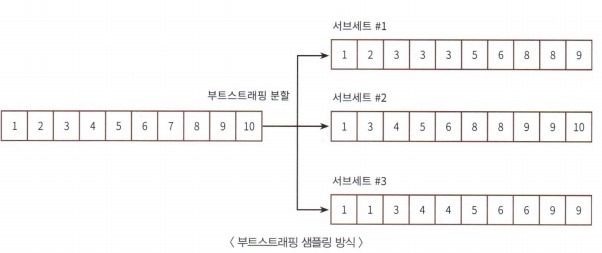

In [134]:
Image('/content/drive/MyDrive/today/분류_앙상블2_배깅_부트스트래핑.jpg')
# 서브셋에 중복된 데이터들이 여러번 등장한다 -> 기존 cv와는 다른점
# 앙상블 학습의 특이점

## 배깅-랜덤포레스트

- Bagging
- 동일 알고리즘을 여러개 만들어서, 보팅을 수행한다
- 대표 알고리즘
  - 랜덤 포레스트
    - 뛰어난 성능, 빠른 수행시간, 유연성등등 
    - 기초 알고리즘으로 **결정트리를 사용**

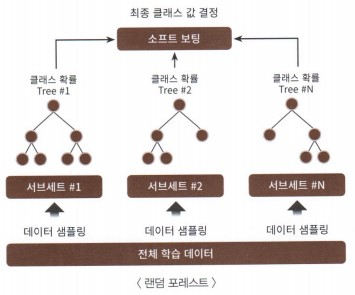

In [135]:
Image('/content/drive/MyDrive/today/분류_앙상블2_배깅_랜덤포레스트.jpg')
# 아래그림
# 알고리즘 3개 사용
# 데이터셋은 중복된 데이터가 들어갈 수 있다 -> 부트 스트래핑
# 3개의 동일 알고리즘은 각각 다른 하이퍼파라미터를 사용하여 서로 다른 데이터를 가지고 학습/예측 수행
# 개별 확률을 더해서 평균을 내어 분류를 수행한다 -> 소프트 보팅 수행
# 이러 개념을 모두 포괄한 알고리즘이 랜덤 포레스트

- 랜덤 포레스트
  - 집단 학습 기반
  - 구성에 따라 고밀도 정밀 분류, 회귀, 클러스터링도 모두 작업 가능하다
    - 하드/소프트 보팅 가능
    - 학습 데이터를 무작위로 샘플링을 수행한다 -> 랜덤

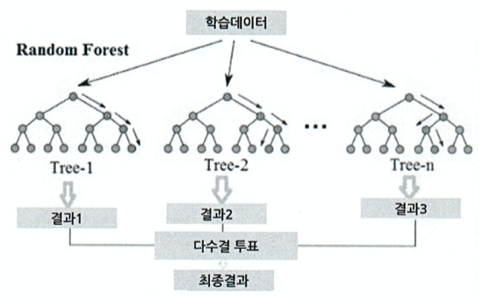

In [136]:
Image('/content/drive/MyDrive/0404_res/ml-랜덤포레스트.png')

In [137]:
# 위에서 사용한 동일한 암 데이터를 활용
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [138]:
# 알고리즘 생성
from sklearn.ensemble import RandomForestClassifier

'''
  하이퍼 파라미터
  n_estimators: 기본값 : 100, 결정트리 알고리즘을 몇개 사용할 것인가?
  결정트리의 파라미터이다 -> 동일한 파라미터를 가진 알고리즘은 다양한 데이터를 통해서 학습
  => 알고리즘별로 다른 파라미터를 넣는다면 더 좋을 수도 있지 않을까?
    => 동일 알고리즘이라도 하이퍼파라미터를 다르게 세팅하고 싶다 -> 하이퍼파라미터 튜닝 기법 적용 
'''
rf_clf = RandomForestClassifier(random_state = 0)

In [139]:
# 훈련
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [140]:
# 예측
rf_clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [141]:
# 평가
accuracy_score(y_test, y_pred)

0.9440559440559441

- 정확도 상승 밑 알고리즘 파라미터 튜닝

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  # '파라미터명' : [값의 후보들 ]
  'n_estimators' : [ 100, 200 ],       # 결정트리 개수. 사용하는 알고리즘 개수
  'max_depth'    : [ 6, 8, 10, 12 ],   # 결정트리의 최대 깊이값  배분
  'min_samples_split': [ 8, 12, 16 ],  # 규칙노드에서 브랜치를 수행하기 위한 최소 데이터셋 수
  'min_samples_leaf': [ 8, 16, 24]     # 리프노드로 결정되는 최소 데이터수 
}
# n_job : CPU 코어를 학습시 몇개를 사용할 것인가? -1 = 모든 코어 동원해서 학습
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)

grid_cv = GridSearchCV( rf_clf, param_grid, cv = 5, n_jobs = -1) 

In [143]:
# 학습
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 16, 24],
                         'min_samples_split': [8, 12, 16],
                         'n_estimators': [100, 200]})

In [144]:
# 최적의 파라미터, 점수
# 랜덤포레스트의 내부에서 사용하는 결정트리의 하이퍼파라미터는 1개의 최저 세트로 사용된다
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.9459917920656634


In [145]:
# 피쳐의 중요도
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [146]:
# 분류의 성능을 높이기 위해서 영향력이 적은 컬럼은 제거, 압축한다 => 그 판단을 위해서 시각화
rf_clf.feature_importances_

array([0.02515433, 0.01563844, 0.05372655, 0.04861645, 0.00769078,
       0.00936994, 0.05539489, 0.10305394, 0.0065771 , 0.00282708,
       0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
       0.00432096, 0.00448775, 0.00657502, 0.00460597, 0.00627095,
       0.11657269, 0.01603133, 0.16027724, 0.0634688 , 0.01356448,
       0.01164113, 0.03923725, 0.11711756, 0.01164259, 0.00960721])

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
tmp = pd.Series(rf_clf.feature_importances_, index = cancer.feature_names)
tmp = tmp.sort_values(ascending= False)
tmp

worst perimeter            0.160277
worst concave points       0.117118
worst radius               0.116573
mean concave points        0.103054
worst area                 0.063469
mean concavity             0.055395
mean perimeter             0.053727
mean area                  0.048616
worst concavity            0.039237
area error                 0.034202
radius error               0.029215
mean radius                0.025154
worst texture              0.016031
mean texture               0.015638
worst smoothness           0.013564
perimeter error            0.013429
worst symmetry             0.011643
worst compactness          0.011641
worst fractal dimension    0.009607
mean compactness           0.009370
mean smoothness            0.007691
mean symmetry              0.006577
concave points error       0.006575
fractal dimension error    0.006271
texture error              0.006078
symmetry error             0.004606
concavity error            0.004488
compactness error          0

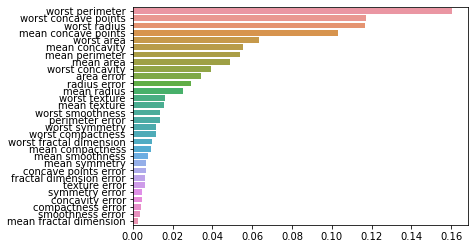

In [149]:
# sns.barplot(x = rf_clf.feature_importances_, y = cancer.feature_names)
sns.barplot(x = tmp, y = tmp.index)
plt.show()
# 분류 모델이 분류를 잘하는데 영향을 미치는 컬럼의 지배력을 서열화해서 시각화

## 부스팅

- Boosting
- 최근 사용빈도가 높아진 알고리즘 형태
- 원리
  - 여러개의 약한 분류기(알고리즘)을 순차적으로 학습 예측하여서, **잘못 예측한 데이터에 가중치를 부여하여 오류를 개선하는 방식으로 학습을 진행**하는 방식
- 여러개의 알고리즘들은 각자의 방식으로 오류를 개선한다

### AdaBoost

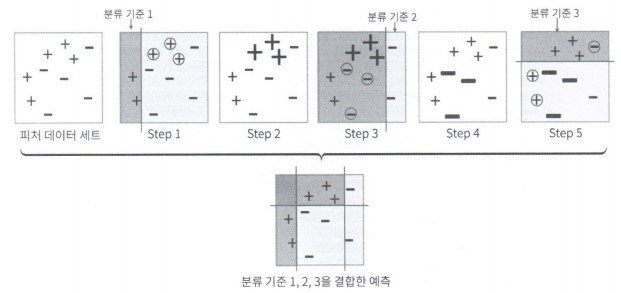

In [150]:
'''
- 데이터가 적당히 분포되어 있다(피쳐데이터셋 그림)
- step1 : 분류기준 1을 기준으로 +를 분류한다, +를 포함한다면 동그라미, 아닌 것은 잘못된 것으로 간주한다
          분류기준 1을 기반으로 왼쪽은 + 영역, 오른쪽은 - 영역이라고 한다면
          오른쪽에서 +를 포함하고 있다면 동그라미, 아닌 것은 그냥 둔다

- step2 : 잘못 분류된 데이터 =? 동그라미+ => 오류 => 오류에 가중치를 부여하여
          +가 두껍게 표시되었다

- step3 : 가중치를 받은 +를 포함하여 다시 분류 => + 영역이 넓어짐
          => -동그라미 등장

- step4 : 오류 데이터 => -동그라미 => 가중치 부여 => 두꺼운 -

- step5 : 반복 => 최종적으로 결합을 해보면 분류 기준이 생성된다 => 오랜 시간이 걸림          
'''
Image('/content/drive/MyDrive/today/분류_앙상블3_부스트.jpg')

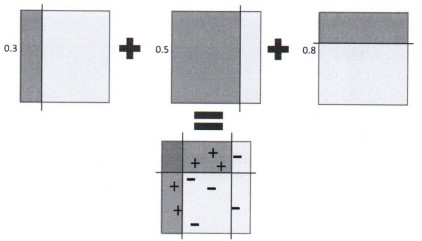

In [151]:
Image('/content/drive/MyDrive/today/분류_앙상블3_부스트2.jpg')
# 여러번의 분류를 시도해서 그 가중치를 더해주면, 최종적으로 분류된 가중치 값들이 표현
# 진한 곳, 연한 곳, 중간값 등등 보인다

### GBM

- Gradient Boost Mechine
- 경사하강법을 가중치를 계산하는데 활용하는 기법
- 경사하강볍
  - 특정값(예 0.001)을 기반으로 지속적으로 업데이트(값을 미세조정)하면서, 예측값이 향상되었는지 체크 -> 시간이 지날수록 기울어진다(값의 추이)
  - 딥러닝이 최적화 기법에서 등장, 여러가지 기법들이 존재
  - 언제까지 미세조정을 할 것인가? 최적의 정확도가 나올때까지 반복 -> **학습시간이 많이 소요된다**

- AdaBoost 와의 차이점은 가중치 업데이트라는 차이
- 예
  - h(x) = y - F(x) = 실제값 - 예측값 = 오차값
  - 오차값을 최소화하는 방향으로 F(x)를 구성하는 특정 성분 중 가중치(W:weigt)를 미세조정한다
  - 오차값이 0에 수렴하도록 W를 조정한다

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

# 시간측정용
import time

In [153]:
# 시작 시간
start_time = time.time()

# GBM
gbm_clf = GradientBoostingClassifier(random_state=0)
gbm_clf.fit(X_train, y_train)
y_pred = gbm_clf.predict(X_test)
print(accuracy_score(y_test, y_pred) )

# 종료 시간
time.time() - start_time

0.965034965034965


0.45767927169799805

In [154]:
# 하이퍼파라미터 튜닝
'''
  - learning_rate : 학습 시 적용되는 학습비율 -> 0.1 기본값, 이 비율을 조정해보면서 정확도를 판단
                    -> 가중치를 조절하는데 미세조정값이 이 파라미터이다 -> 미세조정값의 역할
  - n_estimators : 분류기에 사용하는 개수 -> 결정트리 개수
  - subsample : 분류기에서 사용하는 학습데이터 샘플량 비율: 현재 1.0 기본값
  - loss      : 손실함수, 경사하강법은 미세조정를 통해서 오차값을 줄이는데 목적 > 판단하는 잣대가 여러가지 함수가 존재            
'''
param_grid = {
    'learning_rate' : [0.05, 0.1, 0.01],
    'n_estimators'  : [100, 500]
}

gbm_clf = GradientBoostingClassifier( random_state=0 )
grid_cv = GridSearchCV(gbm_clf, param_grid, cv=3, verbose=True)
grid_cv.fit( X_train, y_train )

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.01],
                         'n_estimators': [100, 500]},
             verbose=True)

In [155]:
grid_cv.best_params_, grid_cv.best_score_

({'learning_rate': 0.05, 'n_estimators': 500}, 0.9577464788732394)

In [156]:
# 테스트 데이터를 사용한 결과
y_pred = grid_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred) )

0.965034965034965


### XGBoost

- 부스팅 기법 중 가장 많이 사용됨
- GBM의 느린 속도, 과적합 규제하는 방안 없는 문제 => 개선
- 기술적으로는 병렬학습이 가능하다 => 학습효율 극대화
- 하이퍼파라미터는 GBM과 동일하고, 과적합 관련 사항 추가

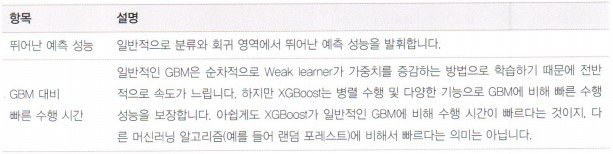

In [157]:
Image('/content/drive/MyDrive/today/분류_앙상블3_xgboost1.jpg')

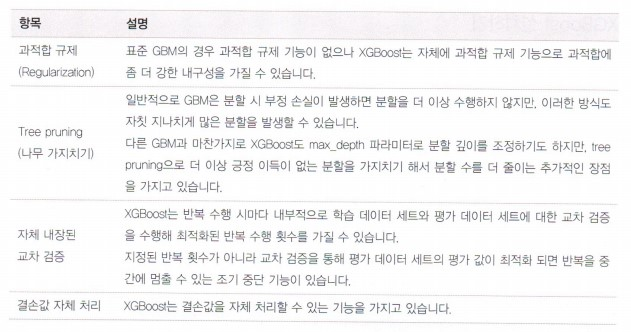

In [158]:
Image('/content/drive/MyDrive/today/분류_앙상블3_xgboost2.jpg')

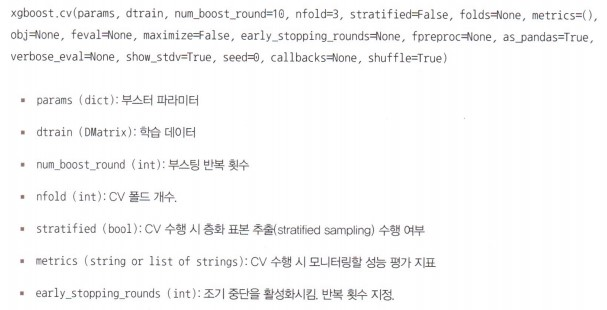

In [159]:
'''
- 학습시 학습 데이터의 포맷이 별도로 존재, DMetrix 형식(Wraping)
- cv : 검증 폴드에 대한 셋업
- strified: 충화 표본 추출 
            -> 모집단(훈련 전체 데이터)들이 cv로 세트 구성할 때 
            서로 중복되지 않게 층으로 나누어서 각 층에서 데이터 추출하는 방식

- early_stopping_rounds : 조기 학습 종료 -> 어느정도 정확도, 손실값 수준으로 수렴해서, 
                          더이상의 학습이 무의미해지면 학습을 조기에 종료한다            
'''
Image('/content/drive/MyDrive/today/분류_앙상블3_xgboost3.jpg')

In [160]:
# 순수 xgboost 스타일
import xgboost as xgb

# sklearn스타일로 wraping된 클래스
from xgboost import XGBClassifier

xgb.__version__

'0.90'

In [161]:
# 데이터
data_df.shape, X_train.shape, X_test.shape

((569, 30), (426, 30), (143, 30))

In [162]:
data_df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


#### 데이터 준비(DMetrix)

In [163]:
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest  = xgb.DMatrix(data = X_train, label = y_train)

#### XGBoost 주요 하이퍼파라미터

- eta
  - 학습비용, 가중치를 조정하는 비율값
  - 사용 : 0.01 ~ 0.03 혹은 기본값
- max_depth
  - 트리 최대 깊이
  - 3 ~ 15 : 홀수값으로 지정
- min_child_weight
  - 하위 노드(바닥쪽에 존재하는 노드들) 이들이 가지고 있는 가중치의 총합
  - 최소 가중치의 합
  - 과소적합을 조정하기 위한 파라미터
  - 각 노드단계에서 발생된 가중치(w)의 총합의 제한값
  - 홀수값으로 지정
- gamma
  - 노드가 분할할 때(브랜치, 서브트리), 최소 감소값을 지정
  - 보수적으로 처리, 손실함수값(오차값)을 고려하여 조정
  - 규칙노드가 브랜치 할 때 판단되는 고려할 값
  - 0.05 ~
- subsample
  - 각 트리에서 관측되는 데이터의 샘플링 비율
  - 과소적합, 과대적합 조정 파라미터
  - 0.6 ~ 1.0 비율 지정
- colsample_bytree
  - 각 트리에서 피쳐(특성, 컬럼)샘플링 비율
  - 0.6 ~ 1.0 비율 지정
- lambda
  - 가중치(w)에 대한 L2 정규화
    - 릿지 알고리즘
- alpha
  - 가중치(w)에 대한 L1 정규화
    - 라쏘 알고리즘

- 도구 관련 파라미터
- eval_metric
  - 평가도구
  - **rmse**(root mean square error)
    - 정답과 예측 사이의 오차율 -> 작을수록 정확도가 높다
  - **mse**(mean square error)
    - 평균 제곱근 오차
  - **mae**(mean absolute error)
    - 평균 절대값 오차
  - 분류쪽에 활용
    - **logloss** : 손실에 로그처리
    - error
    - merror
    - mlogloss
    - **auc**
- seed 
  - 난수 시드
  - 재현성이 목표, 실험을 통제하기 위한 수단, 샘플 데이터를 고정하기 위한 수단
- objective
  - reg.linear
    - 기본값
  - binary : logistic
    - 이진 분류
  - multi : softmax
    - 다중 클래스 분류
    - 지분율
  - multi : softprob
    - 다중 클래스 분류
    - 지분 확률
  

### LightGBM

## 스태킹

# SVM

## 개념

# KNN

## 개념